In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
import pandas as pd
import glob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jillian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_text=pd.read_pickle('cleaned_sections.pkl')

In [3]:
df_text

,sect
source,
Dead_Suns_1,sunrise maiden
Dead_Suns_1,tier sanjaval vagabond medium explorer spee...
Dead_Suns_1,sunrise maiden map key bridge a pilot s st...
Dead_Suns_1,fortune in the stars take your station chec...
Dead_Suns_1,the starfinder adventure path is designed to p...
...,...
Dead_Suns_2,
Dead_Suns_2,
Dead_Suns_2,bulldoze ex when a yaruk uses its trample a...


# Looking at word weights for topics

In [4]:
def preprocess_text(text):
    from nltk.corpus import stopwords
    #Tokenize words while ignoring punctuation
    #letters only, strings longer than 2 letters
    tokeniser = RegexpTokenizer(r'[A-Za-z]{3,}')
    tokens = tokeniser.tokenize(text)
     # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(),pos='v') for token in tokens]
    
    # Remove creating and removing stopwords
    stopwords= stopwords.words('english')
    new_stopwords=['statistics','tactics','ecology','bulk','defense','offense','treasure',
                  'mission','pcs','starfinder',]
    stopwords.extend(new_stopwords)
    keywords= [lemma for lemma in lemmas if lemma not in stopwords]
    return keywords

In [5]:
vectorizer = CountVectorizer(analyzer=preprocess_text)
doc_word = vectorizer.fit_transform(df_text.sect).toarray()
vocab=np.array(vectorizer.get_feature_names())
nmf_model = NMF(n_components=20,random_state=1,max_iter=500)
doc_topic = nmf_model.fit_transform(doc_word)

/home/jillian/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [6]:
num_top_words=20
topic_words=[]
word_weights=[]
for topic in nmf_model.components_:
    word_idx=np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i]for i in word_idx])
    word_weights.append([topic[i] for i in word_idx])

In [7]:
topics_df=pd.DataFrame()
topics_df['topic_num'] = list(range(len(nmf_model.components_)))
topics_df['topic_words']=topic_words
topics_df['word_weights']=word_weights
topics_df.head(20)

,topic_num,topic_words,word_weights
0,0,"[area, room, door, wall, open, contain, two, d...","[9.97374638074037, 9.449618779427167, 6.596032..."
1,1,"[worlds, pact, planet, world, within, species,...","[3.8169875366948705, 3.6485088680280295, 3.391..."
2,2,"[creature, save, effect, level, spell, target,...","[5.827686312322092, 3.8713668164890045, 3.7140..."
3,3,"[ship, starship, crew, drift, pilot, vessel, r...","[8.472871241607397, 3.6757667128425955, 2.7834..."
4,4,"[check, succeed, successful, attempt, one, tak...","[12.125767304686256, 4.171694463072509, 2.6107..."
5,5,"[swarm, hylax, components, suskillon, mind, sh...","[14.749066168864474, 2.2201792076875373, 2.073..."
6,6,"[fleet, corpse, eox, waneda, report, ministry,...","[7.69242280646353, 6.863704778171542, 2.954488..."
7,7,"[azlanti, empire, star, aeon, guard, drive, ru...","[7.585978765758309, 3.103753874626999, 2.94916..."
8,8,"[sun, diver, burn, archipelago, take, fire, kh...","[7.301512861346486, 3.4422420486308103, 2.4842..."
9,9,"[know, see, get, one, ask, might, like, take, ...","[3.755150725471599, 2.9200298720121087, 2.9041..."


# Testing clustering

Tested with multiple k values, due to the presence of so many different topics or clusters within each book the clusters are not very clearly defined

In [8]:
from sklearn.cluster import KMeans

In [9]:
clustering = KMeans(n_clusters=10)
clusters = clustering.fit_predict(doc_topic)

In [10]:
clusters.shape

(6558,)

In [11]:
len(df_text.index)

6558

In [12]:
book_clusters = pd.DataFrame()
book_clusters['section'] = df_text.sect
book_clusters['cluster'] = clusters
book_clusters.head()

,section,cluster
source,,
Dead_Suns_1,sunrise maiden,0
Dead_Suns_1,tier sanjaval vagabond medium explorer spee...,2
Dead_Suns_1,sunrise maiden map key bridge a pilot s st...,0
Dead_Suns_1,fortune in the stars take your station chec...,9
Dead_Suns_1,the starfinder adventure path is designed to p...,0


In [13]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2, random_state=0)
PCAxy = PCA.fit_transform(doc_topic)
PCAxy.shape

(6558, 2)

In [14]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(PCAxy)
 
print(label)

[5 9 5 ... 1 5 1]


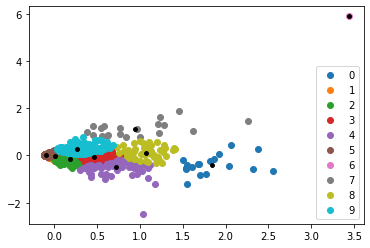

In [15]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(PCAxy[label == i , 0] , PCAxy[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 15, color = 'k')
plt.legend()
plt.show()